In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8     # this will increase the size of the graphs


In [2]:
data = pd.read_csv('kc_house_data.csv')

In [22]:
data.shape

(21613, 19)

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [8]:
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
data.drop(['id','zipcode'],axis=1,inplace=True)

In [12]:
data.head().T

,0,1,2,3,4
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


In [13]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/home/sudhir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


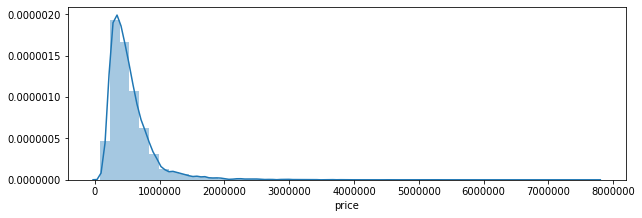

In [17]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['price'])

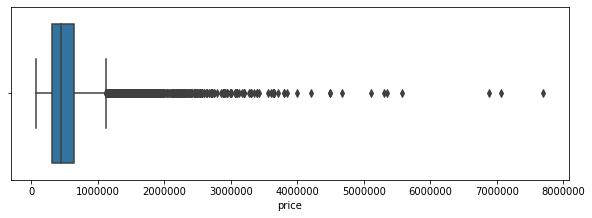

In [19]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.boxplot(data['price'])

/home/sudhir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


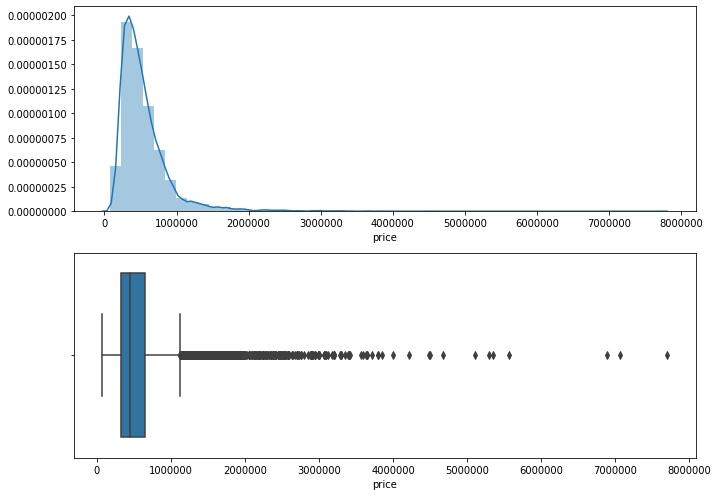

In [20]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(data['price'])
plt.tight_layout()


/home/sudhir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # This is added back by InteractiveShellApp.init_path()


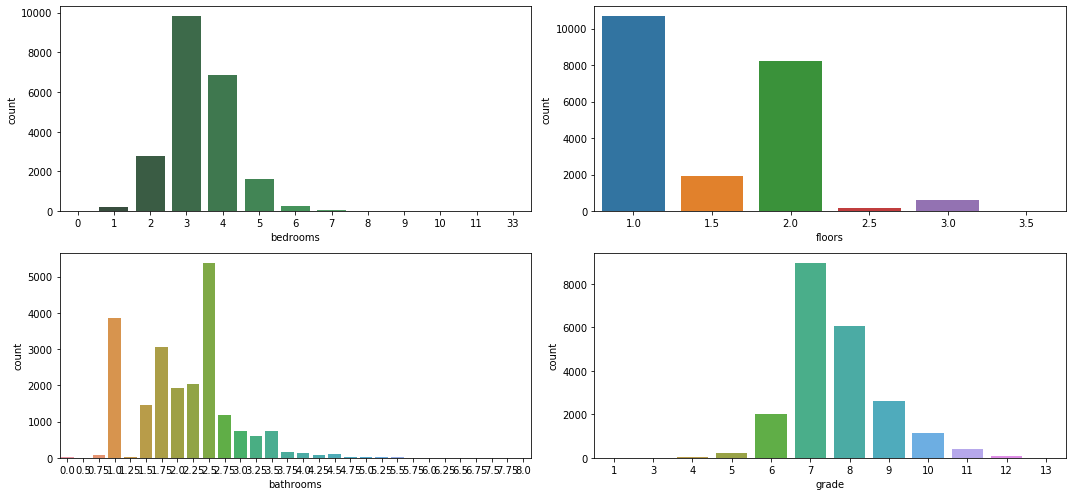

In [24]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(data['grade'])
plt.tight_layout()

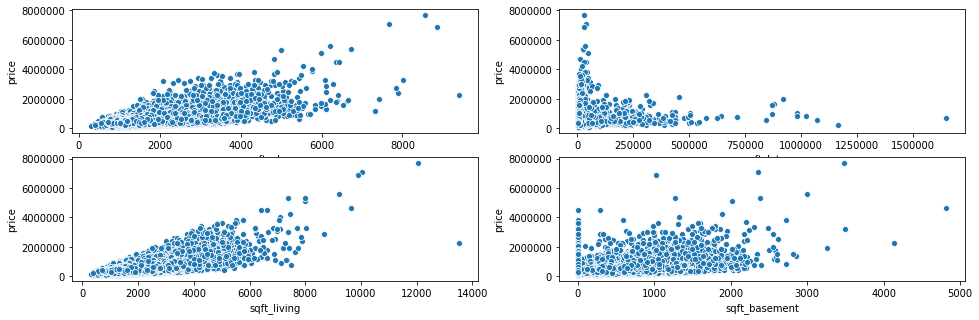

In [27]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['sqft_above'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['sqft_lot'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(data['sqft_living'],data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(data['sqft_basement'],data['price'])

In [30]:
# check correlation
data.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

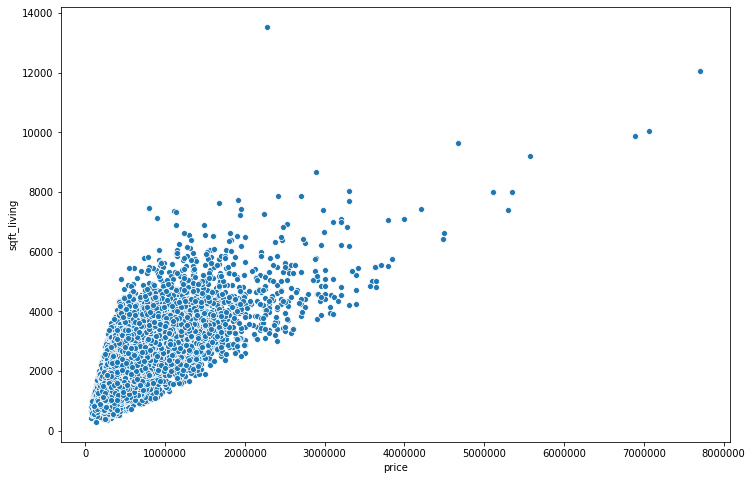

In [31]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=data)

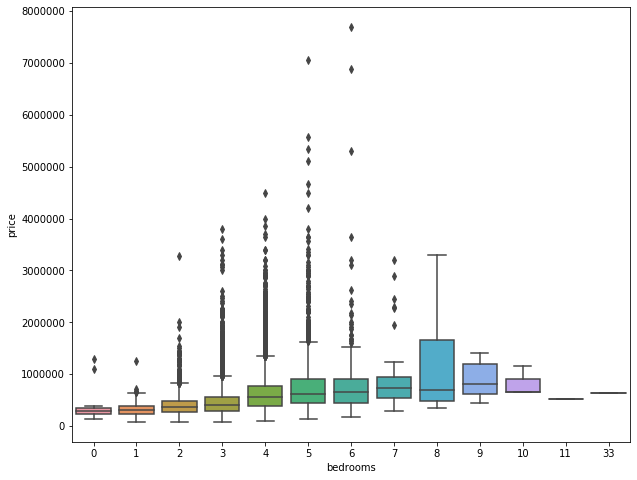

In [32]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = data)

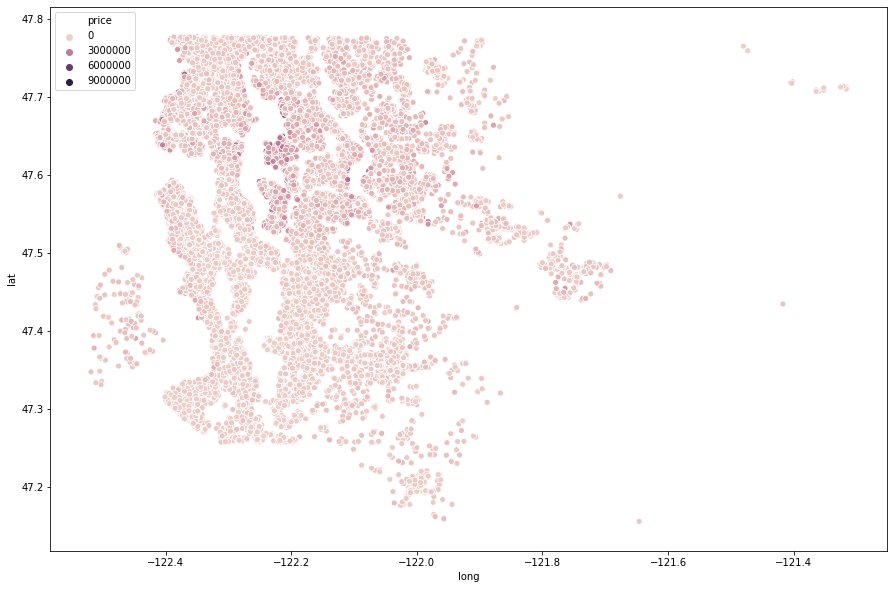

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=data,hue='price')


In [35]:
#let's clean it the map a bit - we are taking 99% bottom price houses
non_top_1_perc = data.sort_values('price',ascending = False).iloc[216:]


In [37]:
len(data)*0.01

216.13

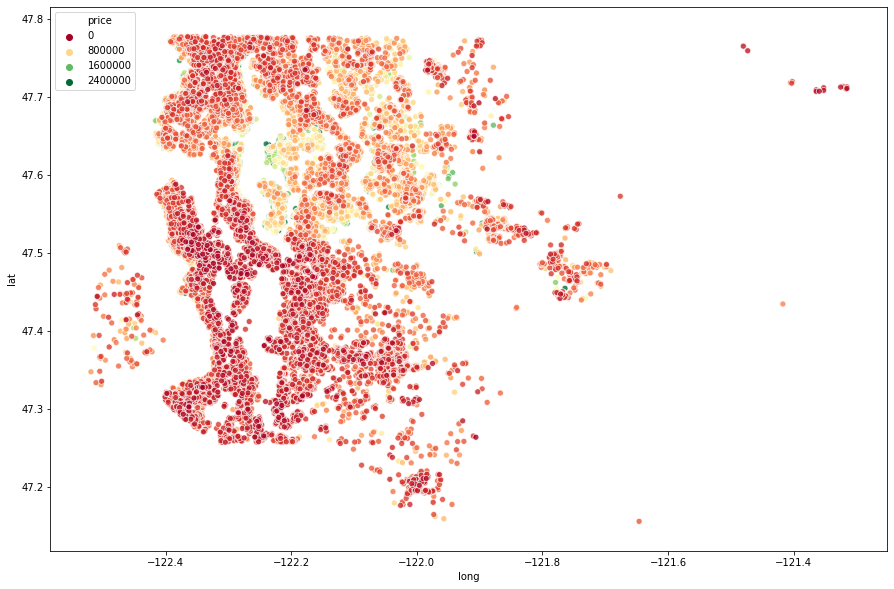

In [38]:
# let's try this one again
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,alpha = 0.8,palette = 'RdYlGn', hue='price')


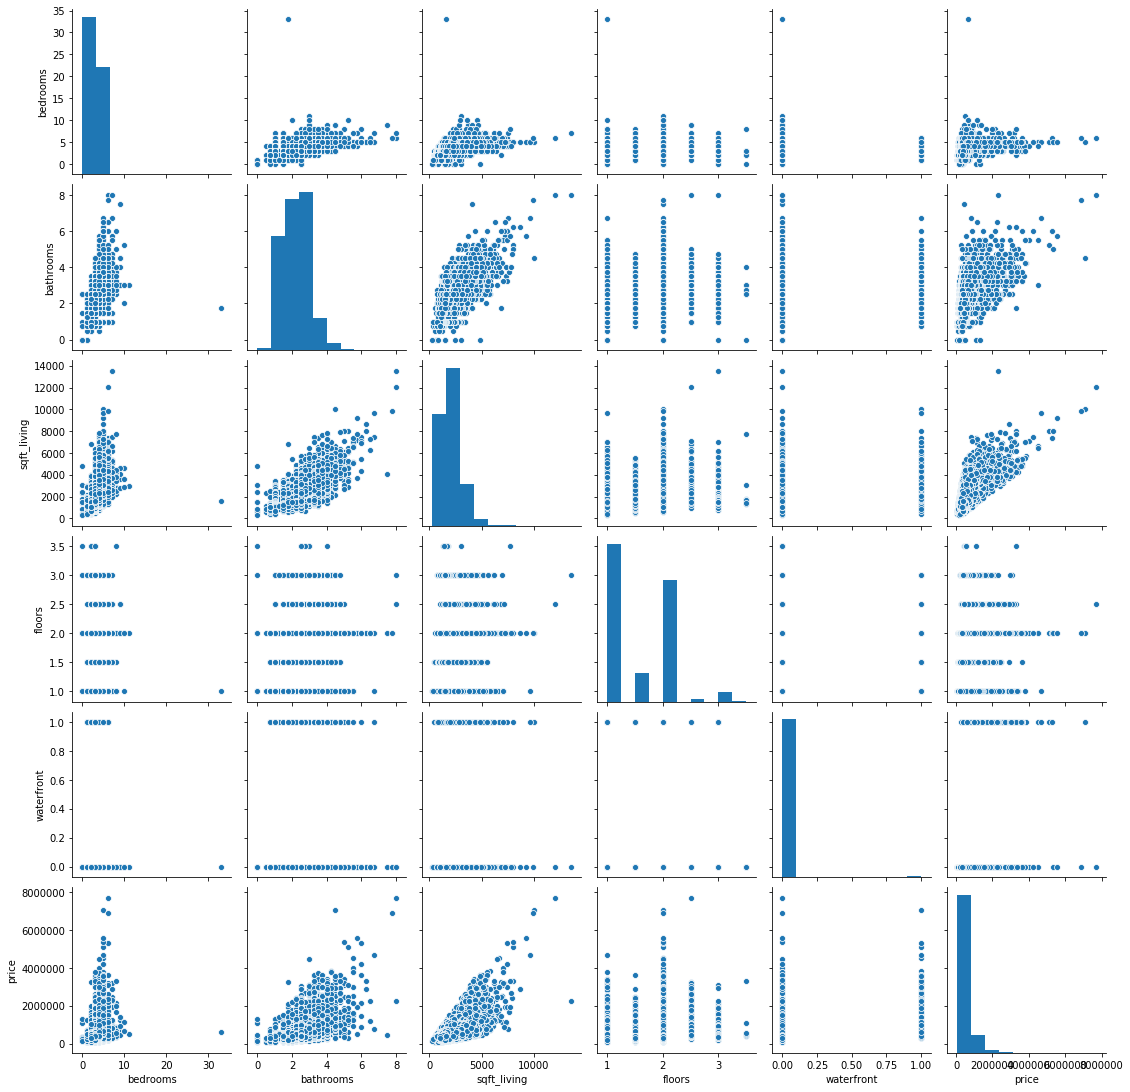

In [39]:
#visualizing data
sns.pairplot(data['bedrooms bathrooms sqft_living floors waterfront price'.split()])


In [41]:
#let's break date to years, months
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)
data.head(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


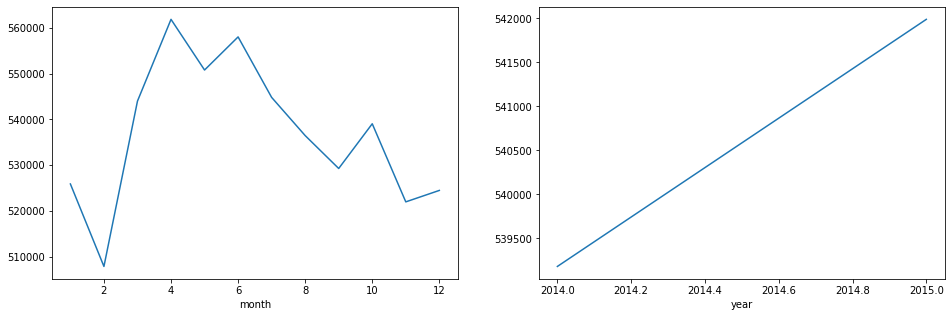

In [42]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
data.groupby('year').mean()['price'].plot()

In [43]:
data = data.drop('date',axis=1)

In [44]:
X = data.drop('price',axis =1).values
y = data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [45]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))


# Method 1: Multiple Linear Regression

In [46]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_


array([-32174.2645862 ,  28314.47160234,  80960.8365489 ,   6428.24177905,
         3413.70406639,  49942.35152741,  36835.82051685,  21903.68879982,
       116003.40529456,  76073.5117404 ,  25375.83805414, -72994.52529983,
         7676.57141888,  78057.84710672, -17254.48220907,  18909.70160034,
       -10301.37920458,   4182.48580611,  17081.43533197])

In [47]:
coeff_df = pd.DataFrame(regressor.coef_, data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
bedrooms,-32174.264586
bathrooms,28314.471602
sqft_living,80960.836549
sqft_lot,6428.241779
floors,3413.704066
waterfront,49942.351527
view,36835.820517
condition,21903.688800
grade,116003.405295
sqft_above,76073.511740


In [48]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,349950.0,530667.784120
1,450000.0,667025.076946
2,635000.0,553195.043391
3,355500.0,346657.166101
4,246950.0,61378.186019
5,406550.0,481162.809294
6,350000.0,312819.788488
7,226500.0,273833.027682
8,265000.0,280571.649291
9,656000.0,532966.844438


/home/sudhir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


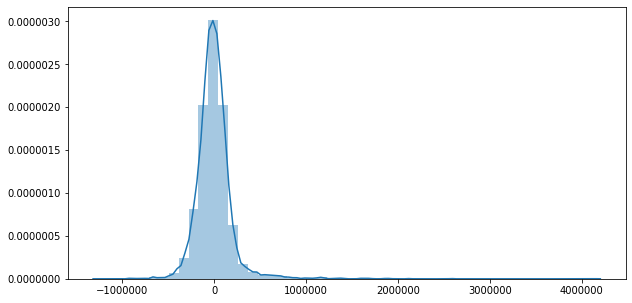

In [50]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [51]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))


Mean Absolute Error: 125933.74
Mean Squared Error:40601153229.62
Root Mean Squared Error:201497.28
Variance score is: 0.70


In [52]:
# we are off about 20% (comparing mean absolut error and mean of price)
data['price'].mean()

540088.1417665294

In [53]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))


Linear Regression Model:
Train Score 0.69
Test Score 0.70


# Method 2: Keras Regression

In [56]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

##### Since we have 19 features, let’s insert 19 neurons as a start, 4 hidden layers and 1 output layer due to predict house Price.

##### Also, ADAM optimization algorithm is used for optimizing loss function (Mean squared error)

In [57]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

##### Then, we train the model for 400 epochs, and each time record the training and validation accuracy in the history object. To keep track of how well the model is performing for each epoch, the model will run in both train and test data along with calculating the loss function.

In [58]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 5s 40ms/step - loss: 425256583168.0000 - val_loss: 428729532416.0000
Epoch 2/400
114/114 [==============================] - 4s 33ms/step - loss: 422841384960.0000 - val_loss: 419589750784.0000
Epoch 3/400
114/114 [==============================] - 4s 35ms/step - loss: 385928888320.0000 - val_loss: 333533151232.0000
Epoch 4/400
114/114 [==============================] - 4s 37ms/step - loss: 237380485120.0000 - val_loss: 133421129728.0000
Epoch 5/400
114/114 [==============================] - 4s 35ms/step - loss: 95215394816.0000 - val_loss: 72462991360.0000
Epoch 6/400
114/114 [==============================] - 3s 27ms/step - loss: 73181487104.0000 - val_loss: 64731828224.0000
Epoch 7/400
114/114 [==============================] - 3s 26ms/step - loss: 66639069184.0000 - val_loss: 59877859328.0000
Epoch 8/400
114/114 [==============================] - 3s 24ms/step - loss: 61936021504.0000 - val_loss: 56083406848.0000
Epoch 9/400
114/

114/114 [==============================] - 2s 18ms/step - loss: 32423604224.0000 - val_loss: 31417116672.0000
Epoch 68/400
114/114 [==============================] - 2s 14ms/step - loss: 32468918272.0000 - val_loss: 31340982272.0000
Epoch 69/400
114/114 [==============================] - 2s 15ms/step - loss: 32358035456.0000 - val_loss: 31306090496.0000
Epoch 70/400
114/114 [==============================] - 2s 15ms/step - loss: 32298438656.0000 - val_loss: 31236798464.0000
Epoch 71/400
114/114 [==============================] - 3s 22ms/step - loss: 32177948672.0000 - val_loss: 31335217152.0000
Epoch 72/400
114/114 [==============================] - 4s 32ms/step - loss: 32273530880.0000 - val_loss: 31205003264.0000
Epoch 73/400
114/114 [==============================] - 3s 30ms/step - loss: 32147884032.0000 - val_loss: 31093190656.0000
Epoch 74/400
114/114 [==============================] - 4s 32ms/step - loss: 32165029888.0000 - val_loss: 31089352704.0000
Epoch 75/400
114/114 [=======

114/114 [==============================] - 3s 26ms/step - loss: 29997078528.0000 - val_loss: 29162721280.0000
Epoch 134/400
114/114 [==============================] - 4s 31ms/step - loss: 29926428672.0000 - val_loss: 29109325824.0000
Epoch 135/400
114/114 [==============================] - 4s 31ms/step - loss: 29918394368.0000 - val_loss: 29077692416.0000
Epoch 136/400
114/114 [==============================] - 3s 24ms/step - loss: 29903661056.0000 - val_loss: 29053351936.0000
Epoch 137/400
114/114 [==============================] - 3s 24ms/step - loss: 29865965568.0000 - val_loss: 29045950464.0000
Epoch 138/400
114/114 [==============================] - 3s 25ms/step - loss: 29885863936.0000 - val_loss: 29020555264.0000
Epoch 139/400
114/114 [==============================] - 3s 29ms/step - loss: 29801951232.0000 - val_loss: 29032441856.0000
Epoch 140/400
114/114 [==============================] - 3s 28ms/step - loss: 29788348416.0000 - val_loss: 29070358528.0000
Epoch 141/400
114/114 

114/114 [==============================] - 3s 27ms/step - loss: 28512028672.0000 - val_loss: 28014753792.0000
Epoch 200/400
114/114 [==============================] - 3s 27ms/step - loss: 28498135040.0000 - val_loss: 28137578496.0000
Epoch 201/400
114/114 [==============================] - 3s 24ms/step - loss: 28455864320.0000 - val_loss: 28188182528.0000
Epoch 202/400
114/114 [==============================] - 3s 30ms/step - loss: 28499826688.0000 - val_loss: 28130754560.0000
Epoch 203/400
114/114 [==============================] - 3s 26ms/step - loss: 28483731456.0000 - val_loss: 27948177408.0000
Epoch 204/400
114/114 [==============================] - 4s 32ms/step - loss: 28395743232.0000 - val_loss: 28034920448.0000
Epoch 205/400
114/114 [==============================] - 4s 34ms/step - loss: 28410771456.0000 - val_loss: 27907516416.0000
Epoch 206/400
114/114 [==============================] - 3s 28ms/step - loss: 28371576832.0000 - val_loss: 27937347584.0000
Epoch 207/400
114/114 

114/114 [==============================] - 4s 36ms/step - loss: 27381946368.0000 - val_loss: 27029436416.0000
Epoch 266/400
114/114 [==============================] - 4s 32ms/step - loss: 27353051136.0000 - val_loss: 26992009216.0000
Epoch 267/400
114/114 [==============================] - 4s 35ms/step - loss: 27390760960.0000 - val_loss: 27007664128.0000
Epoch 268/400
114/114 [==============================] - 3s 30ms/step - loss: 27323787264.0000 - val_loss: 27029899264.0000
Epoch 269/400
114/114 [==============================] - 4s 32ms/step - loss: 27339524096.0000 - val_loss: 26995060736.0000
Epoch 270/400
114/114 [==============================] - 4s 39ms/step - loss: 27305672704.0000 - val_loss: 26980327424.0000
Epoch 271/400
114/114 [==============================] - 3s 31ms/step - loss: 27388282880.0000 - val_loss: 26965395456.0000
Epoch 272/400
114/114 [==============================] - 5s 40ms/step - loss: 27238318080.0000 - val_loss: 26983428096.0000
Epoch 273/400
114/114 

114/114 [==============================] - 4s 32ms/step - loss: 24728031232.0000 - val_loss: 24473278464.0000
Epoch 332/400
114/114 [==============================] - 2s 21ms/step - loss: 24711630848.0000 - val_loss: 24459755520.0000
Epoch 333/400
114/114 [==============================] - 3s 28ms/step - loss: 24638140416.0000 - val_loss: 24282486784.0000
Epoch 334/400
114/114 [==============================] - 3s 26ms/step - loss: 24452292608.0000 - val_loss: 24257439744.0000
Epoch 335/400
114/114 [==============================] - 3s 23ms/step - loss: 24416645120.0000 - val_loss: 24091301888.0000
Epoch 336/400
114/114 [==============================] - 4s 35ms/step - loss: 24408911872.0000 - val_loss: 24074866688.0000
Epoch 337/400
114/114 [==============================] - 4s 37ms/step - loss: 24267792384.0000 - val_loss: 23957706752.0000
Epoch 338/400
114/114 [==============================] - 3s 29ms/step - loss: 24198901760.0000 - val_loss: 23910227968.0000
Epoch 339/400
114/114 

114/114 [==============================] - 4s 34ms/step - loss: 21525608448.0000 - val_loss: 21119119360.0000
Epoch 398/400
114/114 [==============================] - 4s 34ms/step - loss: 21455523840.0000 - val_loss: 21150533632.0000
Epoch 399/400
114/114 [==============================] - 5s 40ms/step - loss: 21419061248.0000 - val_loss: 21029435392.0000
Epoch 400/400
114/114 [==============================] - 4s 32ms/step - loss: 21378414592.0000 - val_loss: 21084555264.0000


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  380       
_________________________________________________________________
dense_1 (Dense)              multiple                  380       
_________________________________________________________________
dense_2 (Dense)              multiple                  380       
_________________________________________________________________
dense_3 (Dense)              multiple                  380       
_________________________________________________________________
dense_4 (Dense)              multiple                  20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


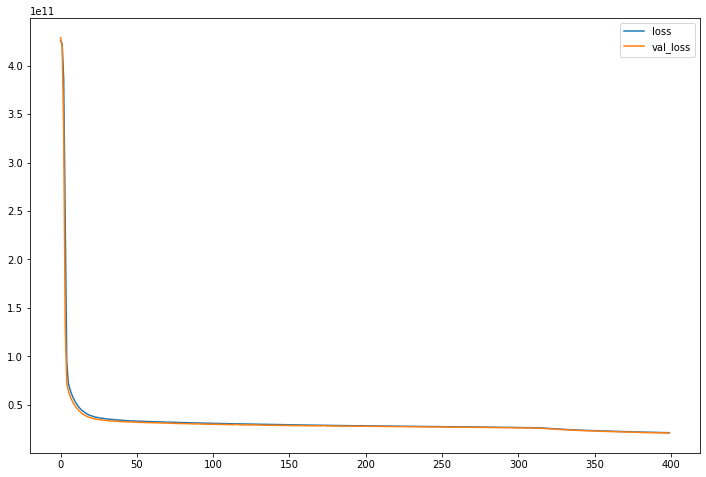

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

## Evaluation on Test Data

In [61]:
y_pred = model.predict(X_test)

In [62]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))


Mean Absolute Error: 88189.75
Mean Squared Error: 21084554186.26
Root Mean Squared Error: 145205.21
Variance score is: 0.85


In [63]:
# we are off about 20% (comparing mean absolut error and mean of price)
data['price'].mean()

540088.1417665294

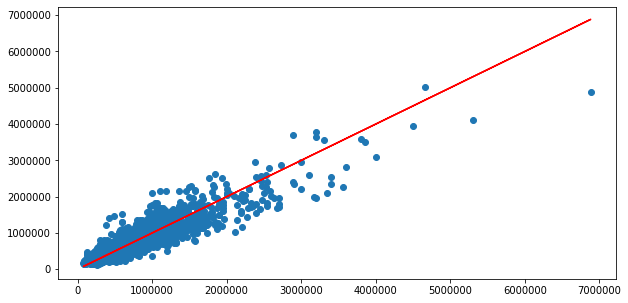

In [64]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

/home/sudhir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


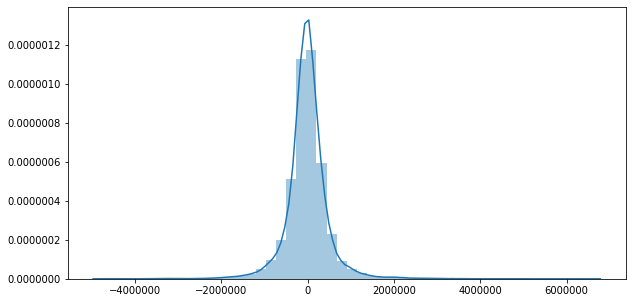

In [65]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)


## Predict the Prices

In [110]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = data.drop('price',axis = 1).iloc[3]


In [111]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))


In [112]:
single_house.shape

(1, 19)

In [113]:
# apply model on those featurs
model.predict(single_house)

array([[462087.88]], dtype=float32)

In [114]:
# compare the prediction with real price for the first column
data['price'][3]

604000.0

# Multiple Linear Regression vs Keras Regression


In [90]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))


Model: Keras Regression

Mean Absolute Error(MAE): 88189.75
Mean Squared Error(MSE): 21084554186.26
Root Mean Squared Error(RMSE): 145205.21
Variance score: 84.69

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 125933.74
Mean Squared Error(MSE):40601153229.62
Root Mean Squared Error(RMSE):201497.28
Variance score: 70.40
